In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import batman




In [2]:
# Import data to use a real lightcurves time
data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)

In [3]:
# Choosing a random LC time
index = 4607
time = data[index][:,0]

time_start = time[0]
bins = np.size(time)

In [4]:
# Use batman to create transits
ma = batman.TransitParams()
ma.t0 = time_start  # time of inferior conjunction; first transit is X days after start
ma.per = 10  # orbital period
ma.rp = 0.1  # 6371 planet radius (in units of stellar radii)
ma.a = 8.47 # semi-major axis (in units of stellar radii)
ma.inc = 90  # orbital inclination (in degrees)
ma.ecc = 0  # eccentricity
ma.w = 90  # longitude of periastron (in degrees)
ma.u = []  # limb darkening coefficients
ma.limb_dark = "uniform"  # limb darkening model
m = batman.TransitModel(ma, time)  # initializes model
synthetic_signal = m.light_curve(ma)  # calculates light curve

# Create noise and merge with flux

noise_mean_ratio = 0.005
noise = np.random.normal(0, noise_mean_ratio, bins)
y = synthetic_signal + noise



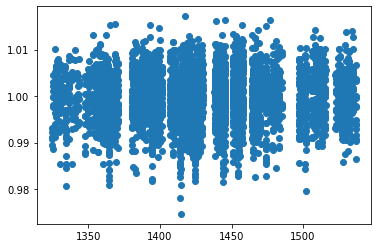

In [5]:
plt.scatter(time, y)